# Heapq

- 부모 노드가 자식보다 같거나 작은 값을 가지는 이진 트리
- 이 구현에서는 모든 k에 대해 heap[k] <= heap[2k+1]과 heap[k] <= heap[2k+2]인 배열 사용
- 가장 작은 요소가 항상 루트(heap[0]) 이 된다.
- 리스트를 마치 최소 힙처럼 다룰 수 있도록 도와준다.

**언제 사용?**
- 1. 데이터가 지속적으로 정렬이 되어야 할 때
- 2. 데이터의 삽입 / 삭제가 빈번히 일어날 때



**method**

- **hq.heappush(heap,x)**
    - 힙에 원소를 추가한다. 
    - 처음 인자는 원소를 추가할 대상 리스트
    - 두번째 인자는 추가할 원소
    - 내부적으로 이진 트리에 원소를 추가하는 heappush() 함수는 O(logN)의 시간 복잡도를 가진다.
    
- **hq.heappop(heap)** 
    - heap 에서 가장 작은 원소를 빼낸다.
    - heap 이 비어있으면 에러가 발생 
    - heappop 원소 또한 O(logN) 의 복잡도를 가진다. 
- **hp.heapify(list)**
    - 이미 원소가 있는 리스트를 힙으로 만든다.
    - 즉 비어있는 리스트를 생성한 이후에 heappush 로 원소를 하나씩 추가한 효과가 난다. 
    - 그러므로 시간 복잡도는 O(NlongN) 이 된다. 
    - heapq.heapify([3, 2, 1, 5, 7]) #[1,2,3,5,7]


In [16]:
import heapq

In [17]:
heap = []
heapq.heappush(heap, 4)
heapq.heappush(heap, 1)
heapq.heappush(heap, 7)
heapq.heappush(heap, 3)
print(heap)

[1, 3, 7, 4]


- 위를 보면 1(k=0) 의 경우 1(2\*0+1)과 2(2\*0+2)번째보다 작은값을 가지고 있다.
- 또한 3(k=1) 의 경우 4(2\*1+1번째) 보다 작은값을 가지고 있다.

# 기초

## 가장 작은 원소에 접근하기

- heap 은 늘 맨 위 노드가 제일 작은값이라는걸 명심하자. 

In [27]:
import heapq as hp
my_list = [13, 2, 1, 5, 10]
hp.heapify(my_list)

# heappop을 하지만, 맨 앞 원소가 최솟값임은 변하지 않음
while my_list:
    print("리스트의 맨 앞 원소:", my_list[0])
    hp.heappop(my_list)

리스트의 맨 앞 원소: 1
리스트의 맨 앞 원소: 2
리스트의 맨 앞 원소: 5
리스트의 맨 앞 원소: 10
리스트의 맨 앞 원소: 13


## 최대 힙 구현


**방법 1. - 값을 집어넣었다가 꺼낼 대도 - 꺼내기**

In [32]:
a = [3,5,2,4,1]
testheap = []
for i in a:
    heapq.heappush(testheap, -i) 
for i in range(5):
    print(-heapq.heappop(testheap))

5
4
3
2
1


**방법 2. 튜플 이용하기**

- heapq 에서는 최대힙이 따로 없어서 구현을 해야한다.
- 아래와 같이 우선순위를 음수로 넣어주고, 그 이후에 넣을 값은 그대로 하면 된다.

In [33]:
nums = [5,1,10,13,2]
heap = []

for num in nums:
    heapq.heappush(heap, (-num, num))  # (우선 순위, 값)
print(heap)
while heap:
    print("리스트의 맨 앞 원소 :", heapq.heappop(heap)[1])  # index 1

[(-13, 13), (-10, 10), (-5, 5), (-1, 1), (-2, 2)]
리스트의 맨 앞 원소 : 13
리스트의 맨 앞 원소 : 10
리스트의 맨 앞 원소 : 5
리스트의 맨 앞 원소 : 2
리스트의 맨 앞 원소 : 1


## K번째 최소/ 최대

In [36]:
import heapq

def kth_smallest(nums, k):
    heap = []
    for num in nums:
        heapq.heappush(heap, num)

    kth_min = None
    for _ in range(k):
        kth_min = heapq.heappop(heap)
    return kth_min

print(kth_smallest([4, 1, 7, 3, 8, 5], 3)) # 4

4


# 응용문제

## 더 맵게

https://programmers.co.kr/learn/courses/30/lessons/42626

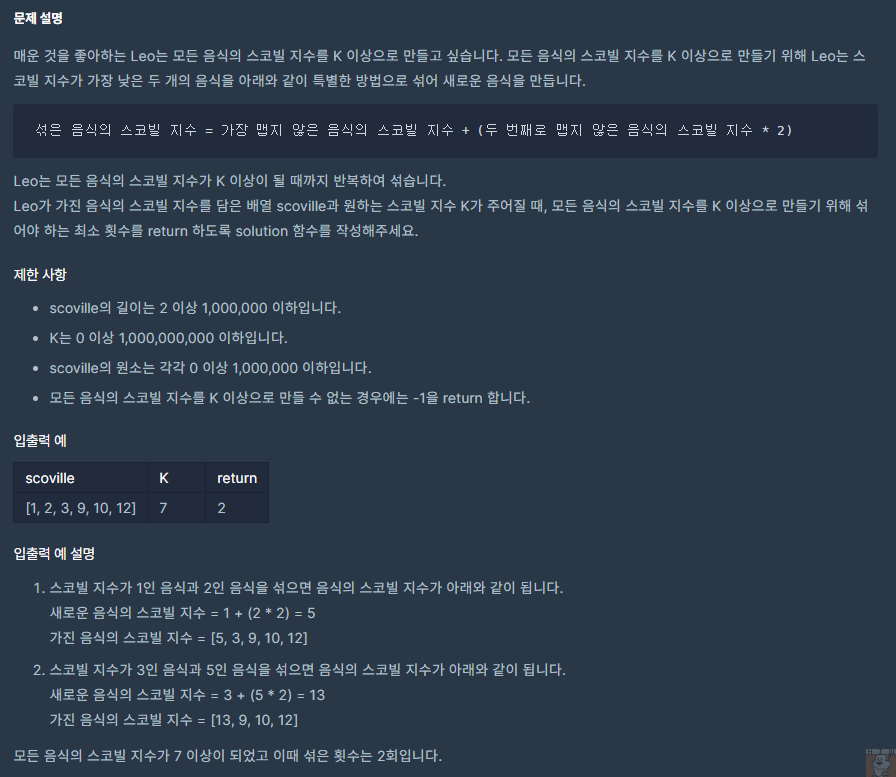

In [11]:
from IPython.display import Image
Image("./image/heap1.png") 

In [37]:
import heapq

def solution(scoville, K):
    answer = 0
    heap = []
    
#---스코빌 지수에 있는 값을 모두 heap 에 넣습니다.---#
    for h in scoville: 
        heapq.heappush(heap, h)
        
#---힙에서 제일 작은값을 꺼냅니다.---#         
    while True:
        current = heapq.heappop(heap)
        
#---만일 힙이 비었고, 가작 작은값이 K 보다 작다면 끝---#
        if len(heap) < 1 and current < K:
            answer = -1
            break
#---만일 가장 작은값이 k 보다 크면 끝---#
        if current >= K:
            break
#---그렇지 않다는것은 아직 가장 작은값이 K 보다 작고, 또한 힙에도 원소가 남아있다는뜻--#
        else:
            answer += 1
            next_node = heapq.heappop(heap)
            heapq.heappush(heap, current + next_node*2)
    return answer

sc = [1, 2, 3, 9, 10, 12]
k = 7
print(solution(sc, k))

2


## 강의실 배정

In [ ]:
# https://www.acmicpc.net/problem/11000
import sys
read = sys.stdin.readline

N = int(read())

lst = [tuple(map(int,read().split())) for _ in range(N)]
lst.sort(key = lambda x : (x[0],x[1])) # 첫번째 기준 정렬하다가 두번쨰 값 기준으로 정렬


# 아래는 시간초과로 인해서 폐기된 풀이입니다.
# while lst :
#     cls = lst.pop(0)
#     late = lst[-1][0] # 가장 늦게 시작하는 강의
#     for i in lst :
#         if i[1] > late :
#             lst.remove(i) # 가장 늦게 시작하는 강의보다 더 늦으면 안됨..
#             break
#         elif cls[1] <= i[0] :
#              cls = i
#              lst.remove(i)
#     cnt += 1
# print(cnt)

# List 로 풀게되면 시간복잡도로 인해, 시간초과를 겪게 됩니다.
# 그러므로 heapq 로 풀어야 합니다.
import heapq as hp
q = []
hp.heappush(q,lst[0][1]) # 처음 강의의 끝나는 시간
# heapq 의 장점은 '실시간으로 계속 정렬된다' 라는것입니다.
# 즉 q[0] 은 업데이트를 계속 함에도 불구하고, 제일 작은값이 딥니다.
# 이떄에, 정렬을 시켰기 떄문에, 최대한 공강이 없게 짤 수 있습니다. 
for i in range(1,N):
    if q[0] > lst[i][0]: # 끝나는 시간 > 시작하는 시간 이면 불가능
        hp.heappush(q,lst[i][1]) # 그러면 그냥 넣기
    else: # 그렇지 않으면, 끝나는 시간 <= 시작하는 시간 즉 연강 가능
        hp.heappop(q)
        hp.heappush(q,lst[i][1])
print(len(q))

# Ref

- https://yunaaaas.tistory.com/36
- https://www.daleseo.com/python-heapq/